<div style="background-color: #147db1; padding: 25px; border-radius: 10px;font-size:20px;font-weight:10px">
  <h1 style="color: #fff;" align="center"><strong>NY Yellow Taxi Trip Data</strong></h1>
</div>

<!-- image link of NY yellow taxi -->

<div align="center"><img src="https://img.freepik.com/premium-vector/cartoon-yellow-retro-taxi-new-york_159379-261.jpg" width="500" height="300"></div>

<div style="background-color: #00A699; padding: 20px; border-radius: 10px;font-size:25px;font-weight:10px">
  <h1 style="color: #333; text-align: center"><strong>Exploratory Data Analysis</strong></h1>
</div>

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings:
import warnings
warnings.filterwarnings('ignore')

<div style="background-color: #f88379; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; text-align: center"><strong>Loading and Checking the Dataset</strong></h1>
</div>

In [152]:
# Importing the csv file:
taxi_data = pd.read_csv("C:\Data Analytics Json\Python\datasets\yellow-tripdata-2025-02.csv")
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,2,2025-02-11 17:34:26.000000,2025-02-11 17:55:29.000000,1,4.92,1,N,13,143,4,-24.7,-2.5,-0.5,0.0,0.0,-1.0,-31.95,-2.5,0.0,-0.75
1,2,2025-02-11 17:34:26.000000,2025-02-11 17:55:29.000000,1,4.92,1,N,13,143,4,24.7,2.5,0.5,0.0,0.0,1.0,31.95,2.5,0.0,0.75
2,2,2025-02-11 17:07:58.000000,2025-02-11 17:13:45.000000,1,1.03,1,N,142,239,1,7.9,2.5,0.5,1.0,0.0,1.0,15.40,2.5,0.0,0.00
3,2,2025-02-11 17:32:28.000000,2025-02-11 17:44:46.000000,1,1.52,1,N,142,162,2,12.8,2.5,0.5,0.0,0.0,1.0,20.05,2.5,0.0,0.75
4,2,2025-02-11 17:47:34.000000,2025-02-11 17:49:42.000000,1,0.32,1,N,229,237,1,4.4,2.5,0.5,1.0,0.0,1.0,12.65,2.5,0.0,0.75


<div style="background-color: #147db1; padding: 25px; border-radius: 10px;font-size:20px;font-weight:10px">
  <h1 style="color: #fff;" align="center"><strong>Initial Inspection</strong></h1>
</div>

In [153]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577543 entries, 0 to 3577542
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        object 
 4   trip_distance          float64
 5   RatecodeID             object 
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   object 
 18  Airport_fee            object 
 19  cbd_congestion_fee     float64
dtypes: float64(9), int64(4), object(7)
memory usage: 545.9+ MB


<!-- stats -->
<div style="background-color: #147db1; padding: 25px; border-radius: 10px;font-size:20px;font-weight:10px"><h1 style="color: #fff;" align="center"><strong>Statistical Analysis</strong></h1></div>

In [154]:
taxi_data.describe()

,VendorID,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,cbd_congestion_fee
count,3.577543e+06,3.577543e+06,3.577543e+06,3.577543e+06,3.577543e+06,3.577543e+06,3.577543e+06,3.577543e+06,3.577543e+06,3.577543e+06,3.577543e+06,3.577543e+06,3.577543e+06
mean,1.795510e+00,6.025357e+00,1.632846e+02,1.624813e+02,9.428504e-01,1.674901e+01,1.238108e+00,4.805158e-01,2.730064e+00,4.052944e-01,9.591618e-01,2.503055e+01,5.373177e-01
std,4.489799e-01,5.433970e+02,6.562958e+01,6.986419e+01,7.249215e-01,7.212927e+01,1.842253e+00,1.299273e-01,3.652688e+00,1.889599e+00,2.643990e-01,7.318542e+01,3.549505e-01
min,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.807600e+03,-7.500000e+00,-5.000000e-01,-2.200000e+02,-1.139300e+02,-1.000000e+00,-1.832850e+03,-7.500000e-01
25%,2.000000e+00,1.000000e+00,1.250000e+02,1.130000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.531000e+01,0.000000e+00
50%,2.000000e+00,1.700000e+00,1.610000e+02,1.620000e+02,1.000000e+00,1.280000e+01,0.000000e+00,5.000000e-01,2.110000e+00,0.000000e+00,1.000000e+00,2.019000e+01,7.500000e-01
75%,2.000000e+00,3.180000e+00,2.330000e+02,2.340000e+02,1.000000e+00,1.980000e+01,2.500000e+00,5.000000e-01,3.790000e+00,0.000000e+00,1.000000e+00,2.797000e+01,7.500000e-01
max,7.000000e+00,2.287825e+05,2.650000e+02,2.650000e+02,4.000000e+00,1.325314e+05,2.255000e+01,1.050000e+01,4.400000e+02,1.158700e+02,1.000000e+00,1.325554e+05,1.250000e+00


<!-- Key Insights -->
### Statistical insights:
1. trip_distance
- The trip distance is normally distributed. But Most trips are short; mean (6.02 miles) and median (1.7 miles) is pulled up by outliers.
- Max: 228,782 miles i.e Unrealistic, clear data error.
2. fare_amount
- Mean: $16.74, Median: $12.80.
- Min: -$1807.60 → Negative values are invalid.
- Max: $132,531.40 → Outlier.
3. total_amount
- Mean: $25.03, Median: $20.19.
- Min: -$1832.85 → Invalid.
- Max: $132,555.40 → Extreme outlier.

<!-- Data Cleaning -->
<div style="background-color: #147db1; padding: 25px; border-radius: 10px;font-size:20px;font-weight:10px"><h1 style="color: #fff;" align="center"><strong>Data Cleaning</strong></h1></div>

In [155]:
# removing negative distances and outliers:
max_distance = taxi_data['trip_distance'].quantile(0.99)
taxi_data = taxi_data[(taxi_data["trip_distance"] > 0) & (taxi_data["trip_distance"] <= max_distance)]

# Replace negative or zero values with median for:
for col in ["fare_amount", "tip_amount", "total_amount"]:
    median_val = taxi_data.loc[taxi_data[col] > 0, col].median()
    taxi_data.loc[taxi_data[col] <= 0, col] = median_val


# filtering cap extreme fares
max_fare = taxi_data['fare_amount'].quantile(0.99)
taxi_data = taxi_data[taxi_data['fare_amount'] <= max_fare]

# Reset index after filtering
taxi_data.reset_index(drop=True, inplace=True)

In [156]:
taxi_data.info()
# 3577542 - 3396632 = 180910 i.e around 5% data is filtered out.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3425982 entries, 0 to 3425981
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        object 
 4   trip_distance          float64
 5   RatecodeID             object 
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   object 
 18  Airport_fee            object 
 19  cbd_congestion_fee     float64
dtypes: float64(9), int64(4), object(7)
memory usage: 522.8+ MB


In [157]:
# converting to datetime:
taxi_data["tpep_pickup_datetime"] = pd.to_datetime(taxi_data["tpep_pickup_datetime"])
taxi_data["tpep_dropoff_datetime"] = pd.to_datetime(taxi_data["tpep_dropoff_datetime"])

<div style="background-color: #f88379; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; text-align: center;"><strong>Info about NYC Yellow Taxi Service</strong></h1>
</div>


In [158]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3425982 entries, 0 to 3425981
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        object        
 4   trip_distance          float64       
 5   RatecodeID             object        
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   object        
 18  Airport_fee           

<!-- Basic exploration -->
<div style="background-color: #147db1; padding: 25px; border-radius: 10px;font-size:20px;font-weight:10px"><h1 style="color: #fff;" align="center"><strong>Basic Exploration</strong></h1></div>

In [159]:
print("Shape of the dataset:", taxi_data.shape)
print("Data types:\n", taxi_data.dtypes)
taxi_data.head()

Shape of the dataset: (3425982, 20)
Data types:
 VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                  object
trip_distance                   float64
RatecodeID                       object
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge             object
Airport_fee                      object
cbd_congestion_fee              float64
dtype: object


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,2,2025-02-11 17:34:26,2025-02-11 17:55:29,1,4.92,1,N,13,143,4,13.06,-2.5,-0.5,3.29,0.0,-1.0,20.22,-2.5,0.0,-0.75
1,2,2025-02-11 17:34:26,2025-02-11 17:55:29,1,4.92,1,N,13,143,4,24.70,2.5,0.5,3.29,0.0,1.0,31.95,2.5,0.0,0.75
2,2,2025-02-11 17:07:58,2025-02-11 17:13:45,1,1.03,1,N,142,239,1,7.90,2.5,0.5,1.00,0.0,1.0,15.40,2.5,0.0,0.00
3,2,2025-02-11 17:32:28,2025-02-11 17:44:46,1,1.52,1,N,142,162,2,12.80,2.5,0.5,3.29,0.0,1.0,20.05,2.5,0.0,0.75
4,2,2025-02-11 17:47:34,2025-02-11 17:49:42,1,0.32,1,N,229,237,1,4.40,2.5,0.5,1.00,0.0,1.0,12.65,2.5,0.0,0.75


In [160]:
# Remove unwanted columns
taxi_data.drop(
    columns=[
        'RatecodeID',
        'store_and_fwd_flag',
        'mta_tax',
        'improvement_surcharge',
        'congestion_surcharge',
        'Airport_fee',
        'cbd_congestion_fee'
    ],
    inplace=True
)

taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount
0,2,2025-02-11 17:34:26,2025-02-11 17:55:29,1,4.92,13,143,4,13.06,-2.5,3.29,0.0,20.22
1,2,2025-02-11 17:34:26,2025-02-11 17:55:29,1,4.92,13,143,4,24.70,2.5,3.29,0.0,31.95
2,2,2025-02-11 17:07:58,2025-02-11 17:13:45,1,1.03,142,239,1,7.90,2.5,1.00,0.0,15.40
3,2,2025-02-11 17:32:28,2025-02-11 17:44:46,1,1.52,142,162,2,12.80,2.5,3.29,0.0,20.05
4,2,2025-02-11 17:47:34,2025-02-11 17:49:42,1,0.32,229,237,1,4.40,2.5,1.00,0.0,12.65


<!-- Extracting more columns from the data frame -->
<div style="background-color: #147db1; padding: 25px; border-radius: 10px;font-size:20px;font-weight:10px"><h1 style="color: #fff;" align="center"><strong>Extracting more columns</strong></h1></div>

In [162]:
# Extract pickup hour and day of week:
taxi_data["pickup_hour"] = taxi_data["tpep_pickup_datetime"].dt.hour
taxi_data["pickup_day"] = taxi_data["tpep_pickup_datetime"].dt.day_name()

# trip duration:
taxi_data["trip_duration_min"] = (taxi_data["tpep_dropoff_datetime"] - taxi_data["tpep_pickup_datetime"]).dt.total_seconds() / 60


In [163]:
# categorizing trip duration:
def categorize_distance(d):
    if d <= 2:
        return "Short"
    elif d <= 5:
        return "Medium"
    else:
        return "Long"

taxi_data["distance_category"] = taxi_data["trip_distance"].apply(categorize_distance)


In [164]:
# amount/ mile:
taxi_data["cost_per_mile"] = taxi_data["total_amount"] / taxi_data["trip_distance"]

# time of day:
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

taxi_data["pickup_period"] = taxi_data["pickup_hour"].apply(get_time_of_day)

In [166]:
taxi_data.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,pickup_hour,trip_duration_min,cost_per_mile
count,3.425982e+06,3425982,3425982,3.425982e+06,3.425982e+06,3.425982e+06,3.425982e+06,3.425982e+06,3.425982e+06,3.425982e+06,3.425982e+06,3.425982e+06,3.425982e+06,3.425982e+06,3.425982e+06
mean,1.792775e+00,2025-02-15 02:28:04.113928960,2025-02-15 02:43:02.381509120,2.874181e+00,1.638090e+02,1.628851e+02,9.465172e-01,1.681150e+01,1.266116e+00,3.816013e+00,3.278851e-01,2.456331e+01,1.438100e+01,1.497113e+01,2.309031e+01
min,1.000000e+00,2025-01-31 22:22:53,2025-01-31 22:30:00,1.000000e-02,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e-02,-7.500000e+00,1.000000e-02,-6.700000e+01,1.000000e-02,0.000000e+00,-7.773333e+01,5.913661e-04
25%,2.000000e+00,2025-02-08 00:47:19.249999872,2025-02-08 01:00:16,1.030000e+00,1.250000e+02,1.130000e+02,1.000000e+00,9.300000e+00,0.000000e+00,2.940000e+00,0.000000e+00,1.560000e+01,1.000000e+01,7.616667e+00,8.038202e+00
50%,2.000000e+00,2025-02-14 21:01:19,2025-02-14 21:17:32,1.730000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.306000e+01,0.000000e+00,3.290000e+00,0.000000e+00,2.022000e+01,1.500000e+01,1.206667e+01,1.147917e+01
75%,2.000000e+00,2025-02-21 22:48:45.750000128,2025-02-21 23:03:19.750000128,3.140000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.944000e+01,2.500000e+00,3.790000e+00,0.000000e+00,2.742000e+01,1.900000e+01,1.853333e+01,1.604000e+01
max,7.000000e+00,2025-03-01 00:06:32,2025-03-01 23:13:42,1.907000e+01,2.650000e+02,2.650000e+02,4.000000e+00,7.000000e+01,1.350000e+01,4.400000e+02,1.019400e+02,4.585500e+02,2.300000e+01,8.564667e+03,1.148300e+04
std,4.517279e-01,NaN,NaN,3.258754e+00,6.569266e+01,6.944561e+01,7.085539e-01,1.230924e+01,1.848312e+00,2.592977e+00,1.557330e+00,1.617946e+01,5.993442e+00,2.567516e+01,1.661234e+02


<!-- Charts -->
<div style="background-color: #09203F; padding: 25px; border-radius: 10px;font-size:20px;font-weight:10px"><h1 style="color: #fff;" align="center"><strong>Data Visualization</strong></h1></div>

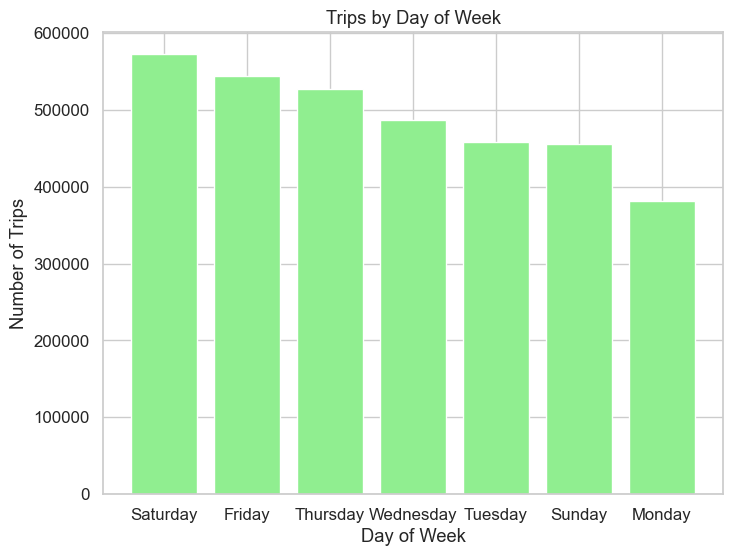

In [168]:
day_counts = taxi_data['pickup_day'].value_counts()
plt.figure(figsize=(8,6))
plt.bar(day_counts.index, day_counts.values, color='lightgreen')
plt.xlabel("Day of Week")
plt.ylabel("Number of Trips")
plt.title("Trips by Day of Week")
plt.show()


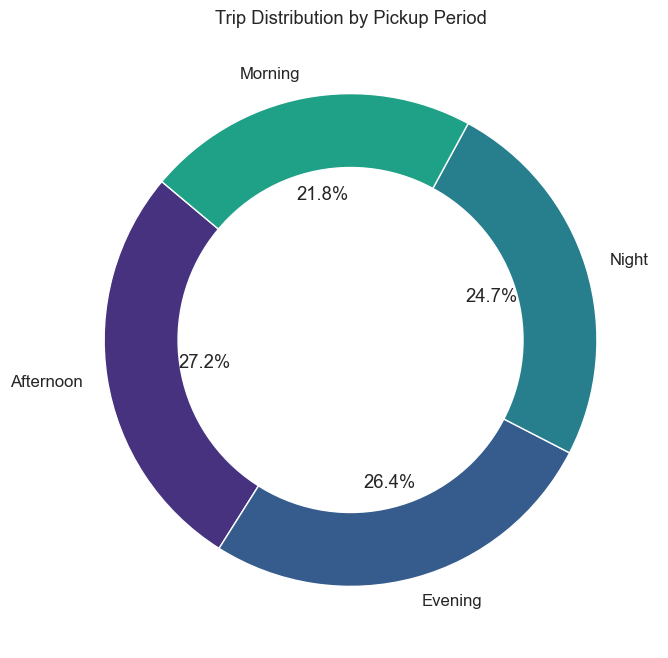

In [169]:
period_counts = taxi_data['pickup_period'].value_counts()

fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(period_counts, labels=period_counts.index, autopct='%1.1f%%', startangle=140)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
plt.title("Trip Distribution by Pickup Period")
plt.show()


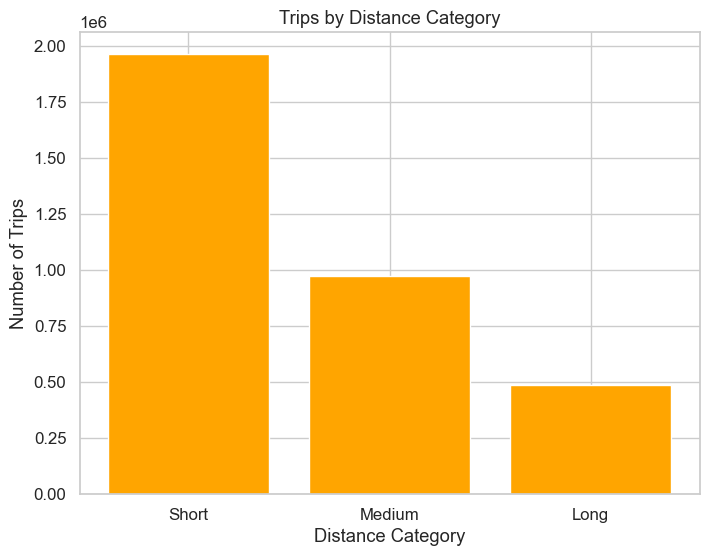

In [170]:
dist_cat_counts = taxi_data['distance_category'].value_counts()

plt.figure(figsize=(8,6))
plt.bar(dist_cat_counts.index, dist_cat_counts.values, color='orange')
plt.xlabel("Distance Category")
plt.ylabel("Number of Trips")
plt.title("Trips by Distance Category")
plt.show()


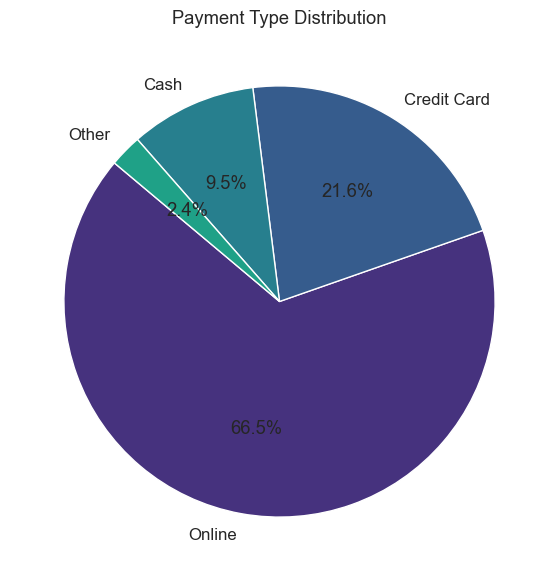

In [173]:
# Mapping payment types to names
payment_mapping = {
    1: "Online",
    2: "Cash",
    3: "No Charge",
    4: "Dispute",
    5: "Credit Card",
    0: "Credit Card"  # for 0 val in the data
}

# Replace numbers with names
payment_counts = taxi_data['payment_type'].map(payment_mapping).value_counts()

# Groupin smaller categories (<3%) into "Other"
threshold = 0.03 * payment_counts.sum()
payment_counts_grouped = payment_counts.copy()
small_categories = payment_counts_grouped[payment_counts_grouped < threshold]
if not small_categories.empty:
    payment_counts_grouped = payment_counts_grouped[payment_counts_grouped >= threshold]
    payment_counts_grouped["Other"] = small_categories.sum()

# Plotim pie chart
plt.figure(figsize=(7,7))
plt.pie(payment_counts_grouped.values, 
        labels=payment_counts_grouped.index, 
        autopct='%1.1f%%', 
        startangle=140)
plt.title("Payment Type Distribution")
plt.show()


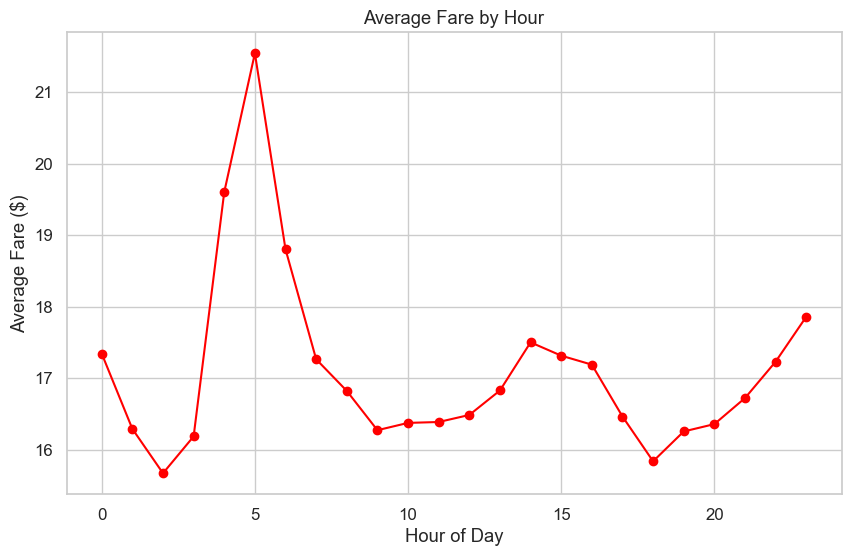

In [174]:
avg_fare_by_hour = taxi_data.groupby('pickup_hour')['fare_amount'].mean()

plt.figure(figsize=(10,6))
plt.plot(avg_fare_by_hour.index, avg_fare_by_hour.values, marker='o', color='red')
plt.xlabel("Hour of Day")
plt.ylabel("Average Fare ($)")
plt.title("Average Fare by Hour")
plt.grid(True)
plt.show()


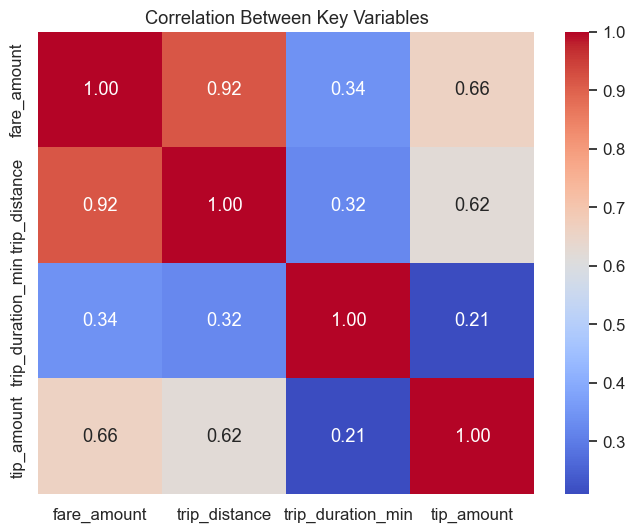

In [175]:
corr_cols = ['fare_amount', 'trip_distance', 'trip_duration_min', 'tip_amount']
plt.figure(figsize=(8,6))
sns.heatmap(taxi_data[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Key Variables")
plt.show()


<div style="background-color: #f88379; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; text-align: center;"><strong>Final Insights</strong></h1>
</div>

1. Peak trip volumes occur during morning and evening rush hours, indicating strong demand from daily commuters.

2. The majority of payments are made via credit card, followed by cash, with smaller categories like “No Charge” and “Dispute” forming less than 5% of total payments.

3. Trip distances are concentrated under 5 miles, but there is a notable cluster of medium-to-long trips contributing to higher total fares.

4. Tip amounts are significantly higher for credit card transactions compared to cash, reflecting customer tipping behavior differences by payment type.

5. Seasonal and day-of-week variations show higher ridership on weekends, suggesting leisure travel contributes to overall demand.

6. Short trips dominate trip counts, but longer trips generate disproportionately high revenue.

7. Extreme fare values and outliers are rare but can be attributed to unusually long-distance trips or data entry errors.


<div style="background-color: #f88379; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333; text-align: center;"><strong>Recommendations for NYC Yellow Taxi Service</strong></h1>
</div>

1. Focus marketing and availability during peak commuting hours and weekends to capture the highest demand.

2. Encourage cash customers to switch to card payments by offering small incentives, as card transactions show higher tipping trends.

3. Optimize route coverage for short-to-medium distance trips, which form the majority of rides, while ensuring enough availability for high-value long-distance requests.

4. Regularly audit fare and trip distance outliers to detect and correct possible data entry or meter errors.

5. Consider partnering with event organizers during weekends and holidays to boost ridership in high-leisure-demand periods.

6. Introduce targeted loyalty programs for frequent riders to increase retention, especially in high-demand neighborhoods.

7. Maintain a healthy balance between trip volume and driver availability to avoid long wait times during peak hours.
